<a href="https://colab.research.google.com/github/Center-for-Health-Data-Science/IntroToML/blob/main/Day1/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
In this part of the exercises, we are going to use the two approaches we learned for classification, viz., logistic regression and linear discriminant analysis. First, let us begin by using the "voting data" (available on github) to explore logistic regression and compare it to linear regression (The full raw data on voting survey in the US can be downloaded from ANES at https://electionstudies.org/data-center/2020-time-series-study/ - you have to log in to download the data OR drop me an email).

## Logistic regression
First let us recall what the form of the logistic regression looks like. If $p(X)\equiv P(Y=1 | X)$ is defined as the probability of an outcome of $Y=1$ given X, then the logistic regression takes the form
$$log\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1x$$
If we have several observations of $X$ and $Y$, specifically, $x_1, x_2, \cdots x_n$ and correspondingly $Y_1, Y_2, \cdots Y_n$, then we can write the likelihood funciton of $\beta_0$ and $\beta_1$ as
$$L(\beta_0, \beta_1) = \prod_{i:Y_i=1} p(x_i) \prod_{i:Y_i=0} (1-p(x_i))$$
 and the log-likelihood can be written as
 $$l(\beta_0, \beta_1) = \sum_{i:Y_i=1} log(p(x_i)) \sum_{i:Y_i=0} log(1-p(x_i))$$

This -ve of the log-likelihood is our cost function, which we want to minimize.
The math above is only for completeness' sake, you do not need to know it.

Now let us see if we can perform a logistic regression using the voting data.

First let us download the data from github.

In [ ]:
%%bash
rm -f Voting_data*
wget https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/Voting_data.txt

Let us also load all the libraries we need in python.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Now let us load the data and take a look at the raw data.

In [3]:
voting = pd.read_table("Voting_data.txt", sep="\t")
voting

,age,voted
0,46,no
1,37,yes
2,40,yes
3,41,yes
4,72,yes
...,...,...
7146,26,no
7147,52,yes
7148,45,yes
7149,65,no


We want to use logistic regression to see if the ages of the people are related to their voting tendencies. We can explore this by looking at the distribution of the ages of the people who voted, and those who did not vote.

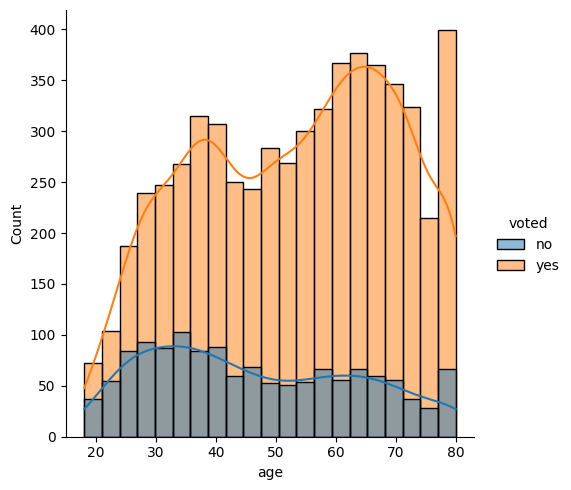

In [4]:
sns.displot(data=voting, x="age", hue="voted", kde=True)

There seem to be some differences in the ages of the people who vote/do not vote. Older people are more likely to vote compared to the young people.
Now, let us use logistic regression to fit the data, so we can predict a person's probability of voting given their age.

First, we are going to split the data into training and testing sets, to avoid overfitting.

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(voting.age, voting.voted, test_size=0.25, random_state=0)
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

Now, we can perform a logistic regression using the inbuilt logistic regression function. We will only use the training data to estimate the parameters.

In [30]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(class_weight="balanced")
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

We can now use this model to predict if a person voted in the test data, and then compute the accuracy of our predictions.

In [31]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.5838926174496645


We can also generate a confusion matrix - our inaccuracy in predictions to see how we are doing.

[Text(77.92222222222227, 0.5, 'True values'),
 Text(0.5, 23.52222222222222, 'Predicted value')]

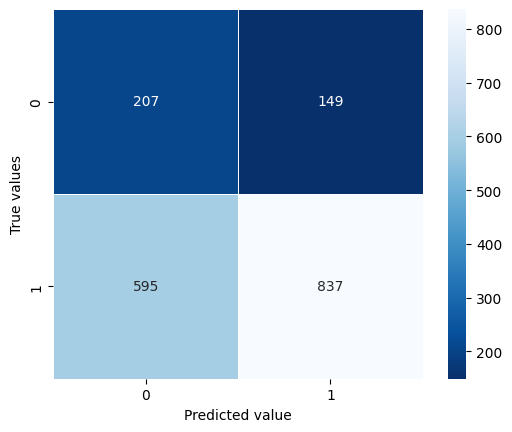

In [36]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
#print(cm)
ax = sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
ax.set(ylabel="True values", xlabel="Predicted value")

Try running the same logistic model but without the `class_weights="balanced"` option. What happens to the confusion matrix and the predictions?

Now, let us try and plot the sigmoid curve for the probability of voting based on the parameters we have obtained from the logistic regression.

Intercept: -1.100, Slope: 0.022


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Probability voted in 2020'), None]

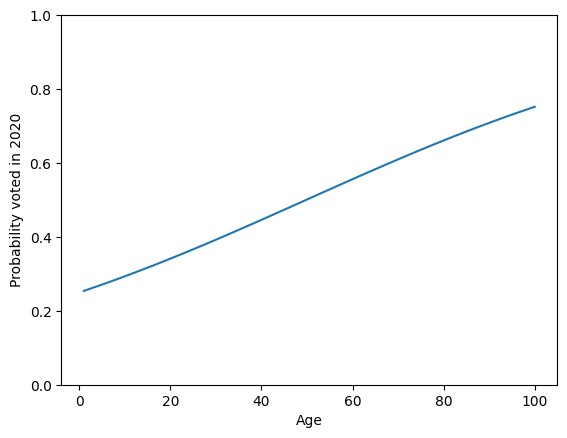

In [37]:
ages = np.arange(1,101)
prob_voting = logisticRegr.predict_proba(ages.reshape([-1,1]))
print("Intercept: {:.3f}, Slope: {:.3f}".format(logisticRegr.intercept_[0], logisticRegr.coef_[0,0]))
ax = sns.lineplot(x=ages, y=prob_voting[:,1])
ax.set(xlabel="Age", ylabel="Probability voted in 2020", ybound=(0,1))

Using this curve, we can see that the slope, i.e. $\beta_1$ is very low, so the sigmoid curve almost looks like a straight line. We can see that age does play a role in voting probability. Also, we can use the curve to predict the probablity of a 50 year old voting - it turns out to 50.66%, and for a 10 year old - it turns out to be 29.79%!

Here, please note that we are running into the well known problem of extrapolating our results out of data range. In the data we have, the range of ages is 18+, so we do not have any data for 10 year olds, and in most places 10 year olds are not allowed to vote. This is a trivial example, but please do be careful about the properties of your datasets.

### MNIST dataset
The voting dataset was a simple example with only one predictor, and two labels. If you want to play with a more complicated dataset, use the MNIST data built into `sklearn`. Start by loading the data.

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

Let us plot and see some of the images.

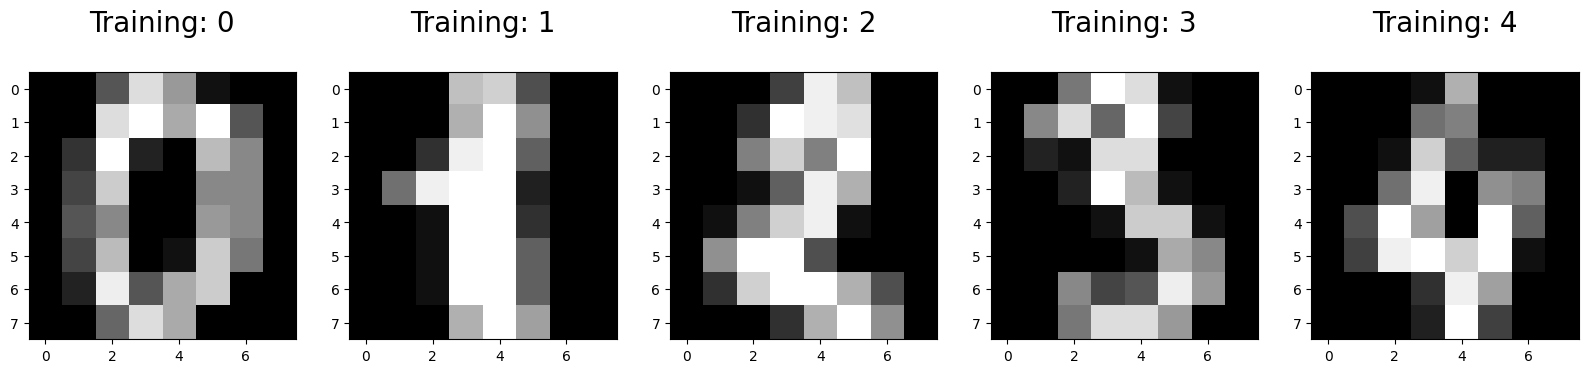

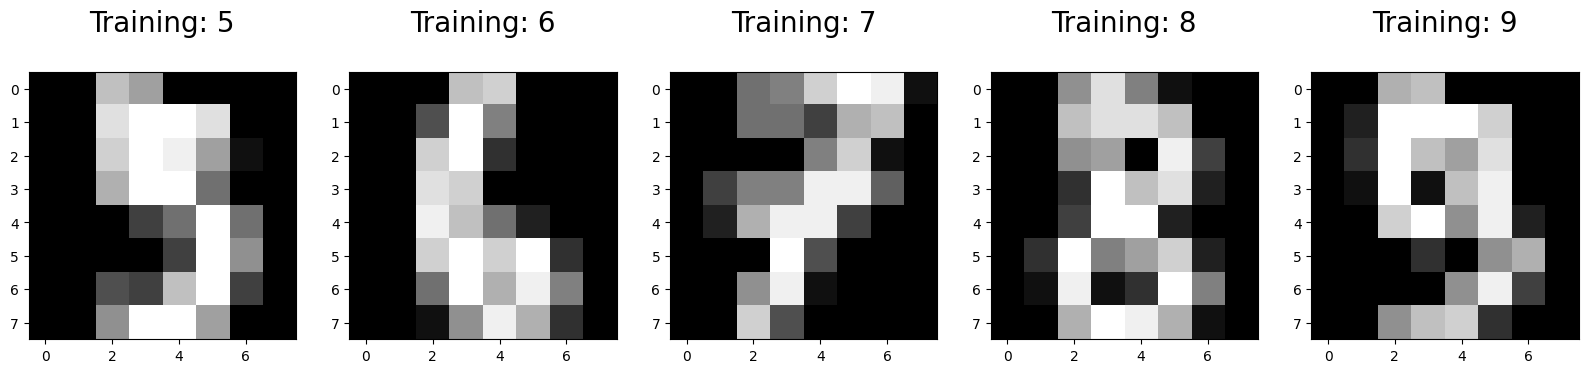

In [39]:
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate(zip(digits.data[5:10], digits.target[5:10])):
 plt.subplot(1, 5, index +1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

Now use the same techniques as the previous example to see how logistic regression works to classify the data here.

Score = 0.967


[Text(0.5, 23.52222222222222, 'Predicted labels'),
 Text(77.92222222222227, 0.5, 'True labels')]

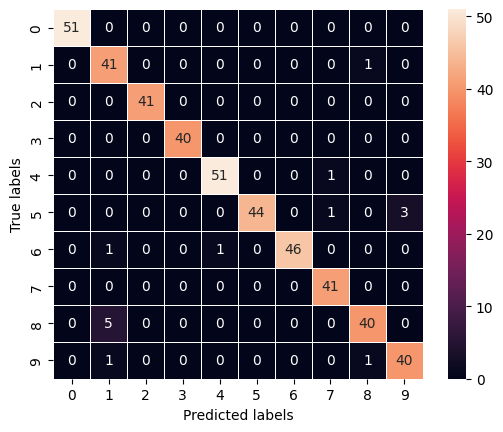

In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(digits.data)
## the pixel intensities are scaled here for each pixel.
## before we do any analysis
digits.data_scaled = scaler.transform(digits.data)
x_train, x_test, y_train, y_test = train_test_split(digits.data_scaled,
                                                    digits.target,
                                                    test_size=0.25,
                                                    random_state=123)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
print("Score = {:.3f}".format(logisticRegr.score(x_test, y_test)))
cm = metrics.confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, linewidths=.5, square = True);
ax.set(xlabel="Predicted labels", ylabel="True labels")

What do the errors look like? They are not independent - the errors tend to be concentrated on a few digit combinations, quite likelly due to the images being quite similar for these digits.

### PCA + logistic regression on gene expression data

First let us download the data again, and then we will run pca to get 20 PCs on it, and finally we will use a number of these PCs to classify the tissue type using logistic regression.

In [ ]:
%%bash
wget https://zenodo.org/record/7822717/files/gtex_1000.csv.gz

Now, let us do a PCA on it, but first let us transform it by a log transform to ensure that the data is on similar scales across the genes. We could also have used our trusted friend - the standard scaler.

In [15]:
gtex_rnaseq = pd.read_table("gtex_1000.csv.gz",sep='\t')
tissue = gtex_rnaseq.tissue
expression = gtex_rnaseq.loc[:, gtex_rnaseq.columns.drop('tissue')].values

from sklearn.preprocessing import StandardScaler
expression_scaled = StandardScaler().fit_transform(expression)

Now let us run PCA on it, with 20 components.

<Axes: xlabel='PC1', ylabel='PC2'>

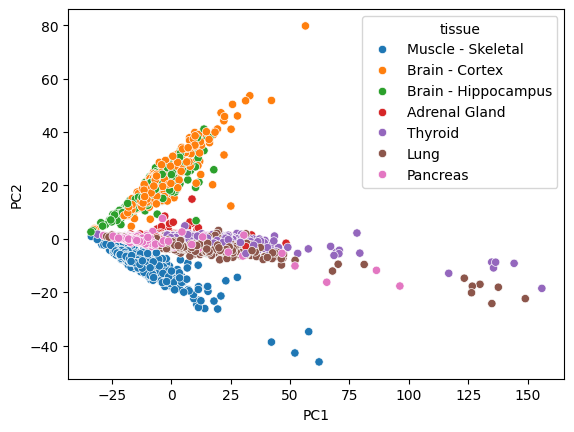

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20).fit_transform(expression_scaled)
pcadf = pd.DataFrame(data=pca, columns=["PC"+str(x+1) for x in range(20)])
sns.scatterplot(data=pcadf, x="PC1", y="PC2", hue=tissue)

Yech!!! Let us revert back to log transforming the data. And then running PCs.

[Text(0, 0.5, 'PC 2 (10.90%)')]

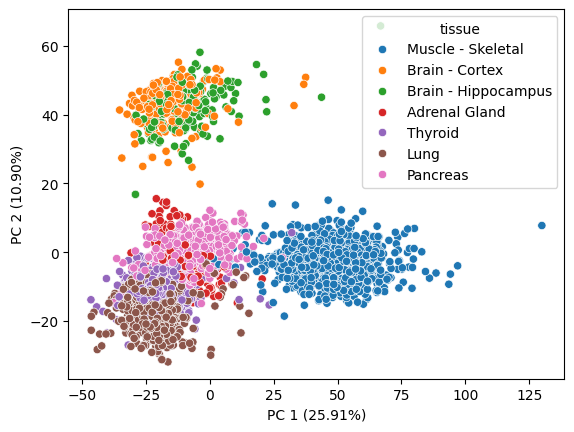

In [17]:
expression = np.log(gtex_rnaseq.loc[:, gtex_rnaseq.columns.drop('tissue')].values + 0.01)
pca = PCA(n_components=20).fit(expression)
pcadf = pd.DataFrame(data=pca.transform(expression), columns=["PC"+str(x+1) for x in range(20)])
ax = sns.scatterplot(data=pcadf, x="PC1", y="PC2", hue=tissue)
ax.set(xlabel="PC 1 ({:.2f}%)".format(pca.explained_variance_ratio_[0]*100))
ax.set(ylabel="PC 2 ({:.2f}%)".format(pca.explained_variance_ratio_[1]*100))

Now it is time to do logistic regression using the first few components and see how the score changes.

Number of components: 1, Score: 0.558
Number of components: 2, Score: 0.773
Number of components: 3, Score: 0.851
Number of components: 4, Score: 0.946
Number of components: 5, Score: 0.950
Number of components: 6, Score: 0.953
Number of components: 7, Score: 0.959
Number of components: 8, Score: 0.956
Number of components: 9, Score: 0.980
Number of components: 10, Score: 0.980
Number of components: 11, Score: 0.983
Number of components: 12, Score: 0.985
Number of components: 13, Score: 0.985
Number of components: 14, Score: 0.983
Number of components: 15, Score: 0.985
Number of components: 16, Score: 0.989
Number of components: 17, Score: 0.988
Number of components: 18, Score: 0.985
Number of components: 19, Score: 0.989
Number of components: 20, Score: 0.989


[Text(0.5, 0, 'Number of components'), Text(0, 0.5, 'Score')]

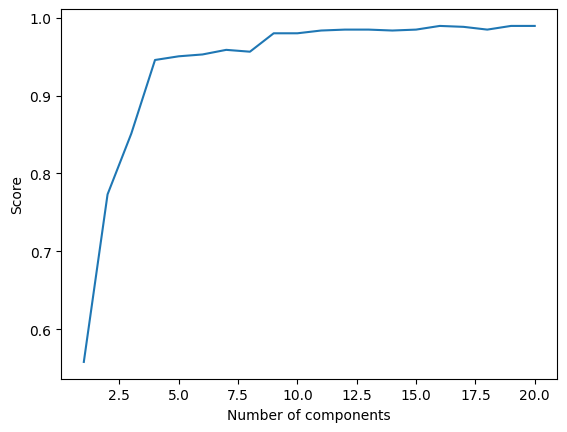

In [42]:
x_train, x_test, y_train, y_test = train_test_split(pca.transform(expression),
                                                    tissue, test_size=0.25,
                                                    random_state=147)
scores = np.zeros((20,2))
for ncomp in np.arange(1,21):
  x_train_ncomp = x_train[:,0:ncomp]
  x_test_ncomp = x_test[:,0:ncomp]
  logisticRegr = LogisticRegression(max_iter=5000)
  logisticRegr.fit(x_train_ncomp, y_train)
  scores[ncomp-1, 0] = ncomp
  scores[ncomp-1, 1] = logisticRegr.score(x_test_ncomp, y_test)
  print("Number of components: {}, Score: {:.3f}".format(ncomp, scores[ncomp-1,1]))

scores = pd.DataFrame(scores, columns = ["ncomp", "score"])
ax = sns.lineplot(scores, x="ncomp", y="score")
ax.set(xlabel="Number of components", ylabel="Score")

# __Ensemble learning__
In this section, we are going to try some ensemble learning tools. We will start with a bagging tool commonly used across multiple fields, called Random Forest. We are going to use ensemble tools only to do classification here, but they can also be used for regression analyses.


## __Random Forest Classifier__
Let us try and use the random forest classifier to classify the mnist digits data.

Score: 0.967


[Text(0.5, 23.52222222222222, 'True label'),
 Text(77.92222222222227, 0.5, 'Predicted label')]

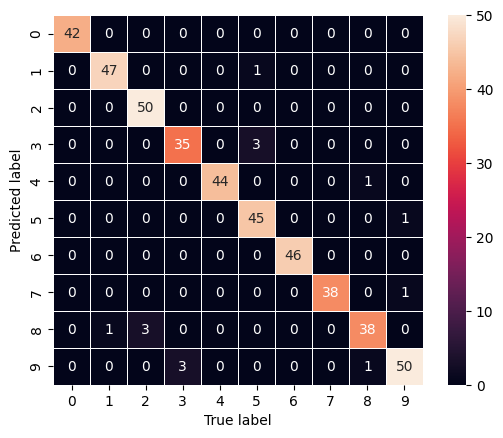

In [19]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(digits.data_scaled,
                                                    digits.target,
                                                    test_size=0.25,
                                                    random_state=198)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)
print("Score: {:.3f}".format(classifier.score(x_test, y_test)))
predictions = classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, linewidths=.5, square = True)
ax.set(xlabel="True label", ylabel="Predicted label")


Let us try and see if we can see the effect of the number of trees (estimators)on prediction accuracy. We can also try and see the interplay between the depth of the individual decision trees and the number of trees and their effect on prediction accuracy.

In [ ]:
ntrees = np.concatenate(([5,10,20,30,40], np.arange(50, 501, 50), np.arange(600, 1501, 100)))
#ntrees = np.array([5,10,20,30,40])
maxdepths = [2,5,10,25,None]
scores = np.zeros((np.shape(ntrees)[0], 5))

for index in np.arange(np.shape(ntrees)[0]):
  nt = ntrees[index]
  print(nt)
  for index2, md in enumerate(maxdepths):
    classifier = RandomForestClassifier(n_estimators=nt, max_depth=md)
    classifier.fit(x_train, y_train)
    scores[index, index2] = classifier.score(x_test, y_test)

[Text(0.5, 23.52222222222222, 'Max depth'),
 Text(50.722222222222214, 0.5, 'Number of trees')]

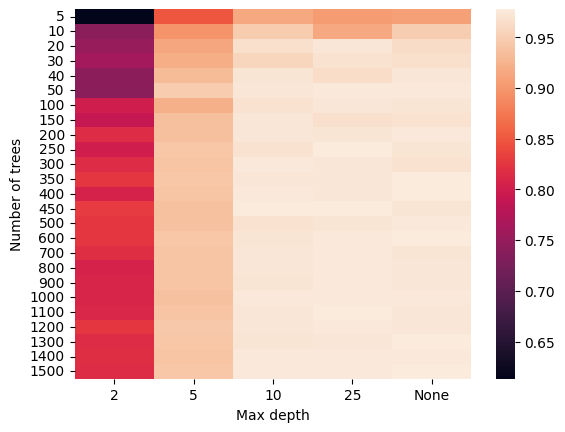

In [21]:
ax = sns.heatmap(scores)
ax.set_xticklabels(["2","5","10","25", "None"])
ax.set_yticklabels(ntrees)
ax.set(xlabel="Max depth",  ylabel="Number of trees")

We can see that increasing either of these variables, in general, increases the accuracy of the predictions. It is important to note that after a quick increase in the prediction accuracy, we do not see huge gains in accuracy. So, computational complexity is one metric to choose these parameters.


# __Other classification techniques__

We can also try some of the other classification methods we discussed in class. We will try a smattering of methods, and you are welcome to try more of them on the MNIST data or the gene expression data.

## __K nearest neighbour__
The first classifier we will try is the k-nearest neighbour classifier. There is one parameter that might change how this method works - the number of neighbours used to figure out the labels. Before trying it out, think about how choosing a very small or a very large number of neighbours will affect the classification accuracy. Think if the outcomes will be noisy or smooth, and if the errors you make will be local or global.

0.9688888888888889


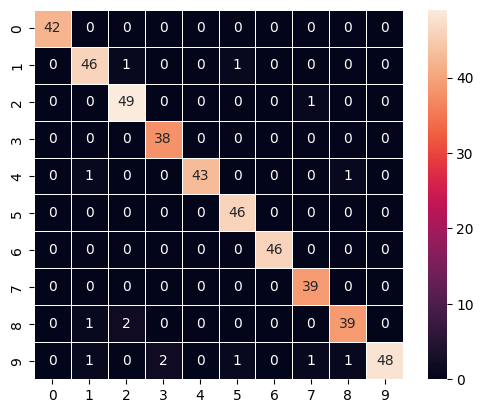

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, linewidths=.5, square = True)
ax.set(xlabel="True labels", ylabel="Predicted labels")

I leave it as an exercise to you to play with the n_neighbours parameter and figure out how it affects the classification accuracy.

You can also try to change it from the k nearest neighbour to the radius neighbourhood classification method. How do you think it will perform as a function of the radius? Can you connect that insight to the performance of KNN with respect to number of neighbours used?

## Gaussian Naive Bayes classifier

This classification method is based on assuming a bayesian framework for the classification problem, where the prior of each label is the same. We can the compute the posterior of the labels under the assumption that the data comes from a Gaussian (Normal) distribution. You can change the data probability distribution, and you can also change the prior probability.

0.7555555555555555


[Text(0.5, 23.52222222222222, 'True labels'),
 Text(77.92222222222227, 0.5, 'Predicted labels')]

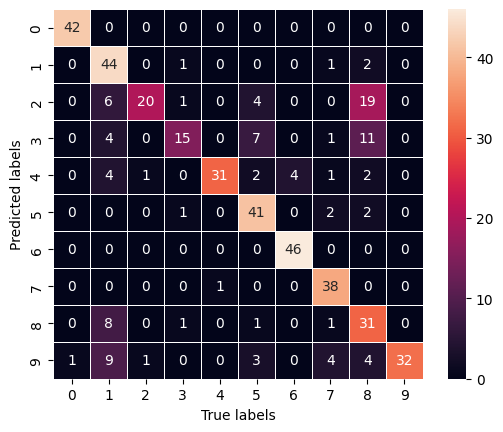

In [25]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(x_train, y_train)
print(nbc.score(x_test, y_test))
predictions = nbc.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, linewidths=.5, square = True)
ax.set (xlabel="True labels", ylabel="Predicted labels")